In [1]:
!source ~/.virtualenvs/background_foreground_segmentation/bin/activate

In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf

from bfseg.utils.datasets import load_data
from bfseg.utils.images import augmentation

batch_size = 2

train_ds = load_data(dataset_name='BfsegCLAMeshdistLabels',
                     scene_type=None,
                     fraction=None,
                     batch_size=batch_size,
                     shuffle_data=False)

In [3]:
for batch in train_ds.take(1):
    break

max label = 1
min label = 0


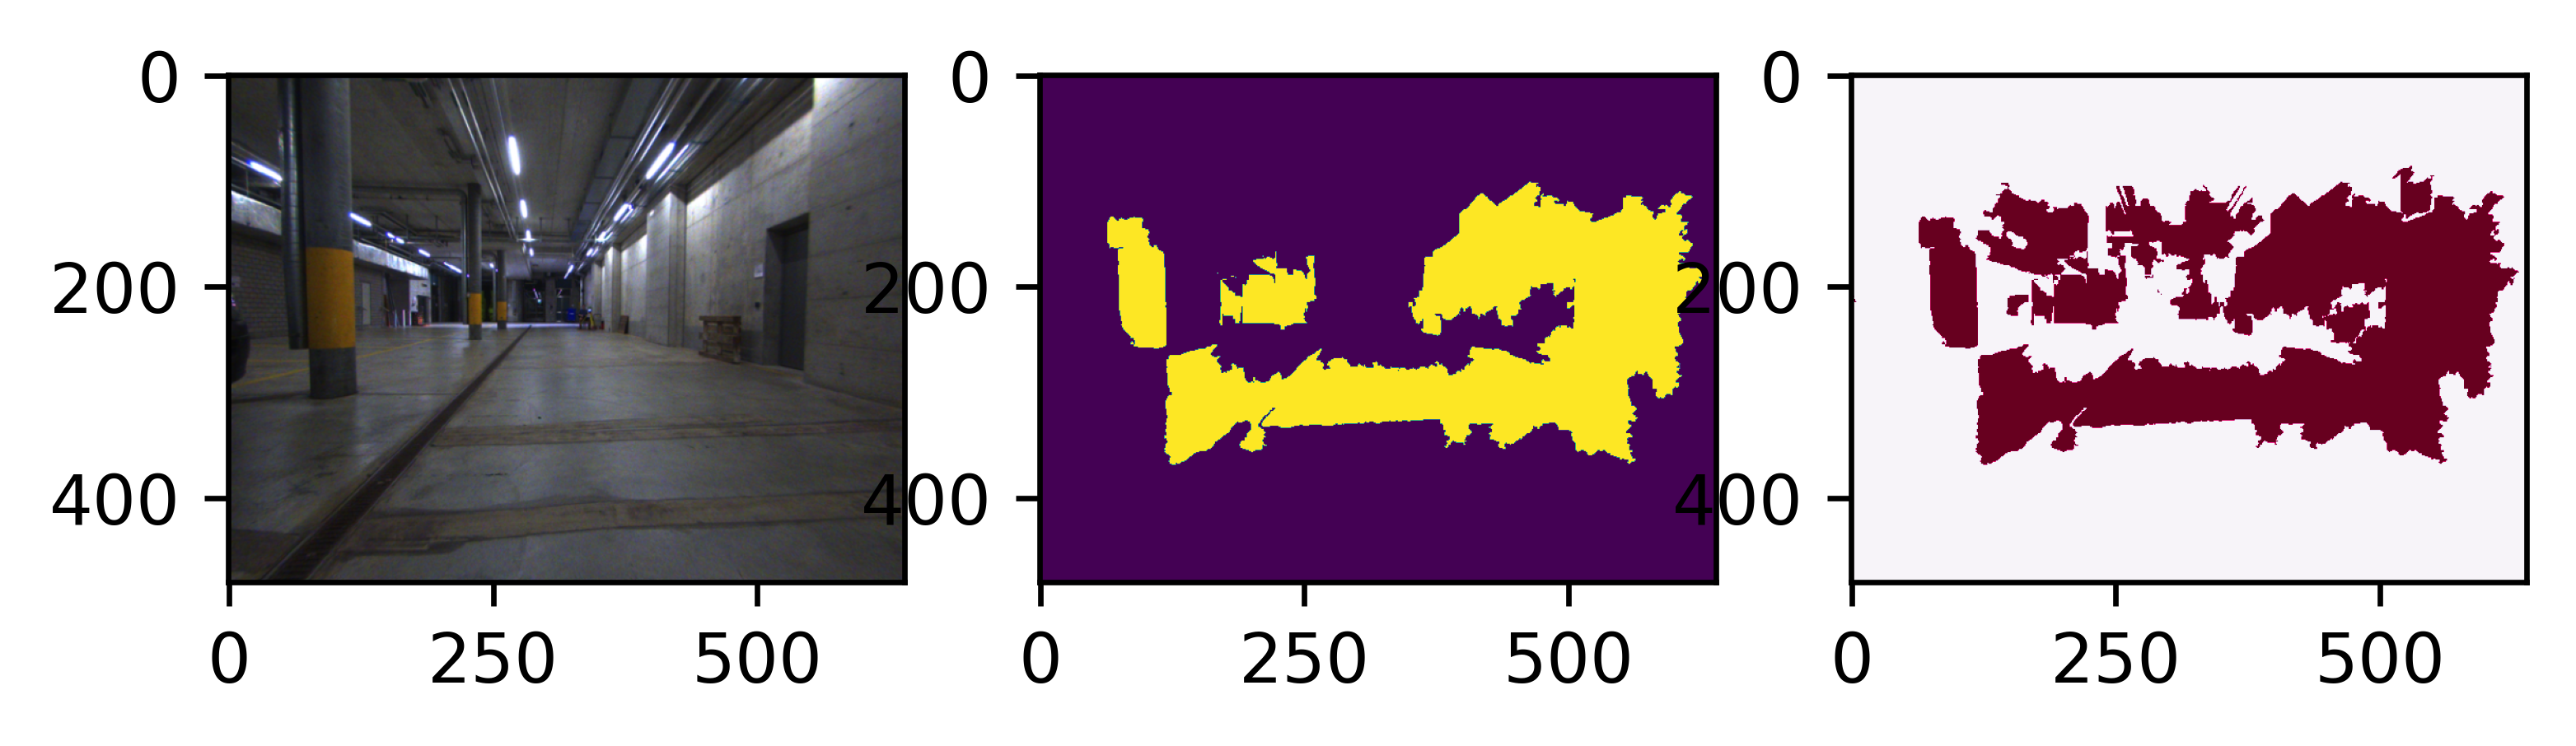

max label = 1
min label = 0


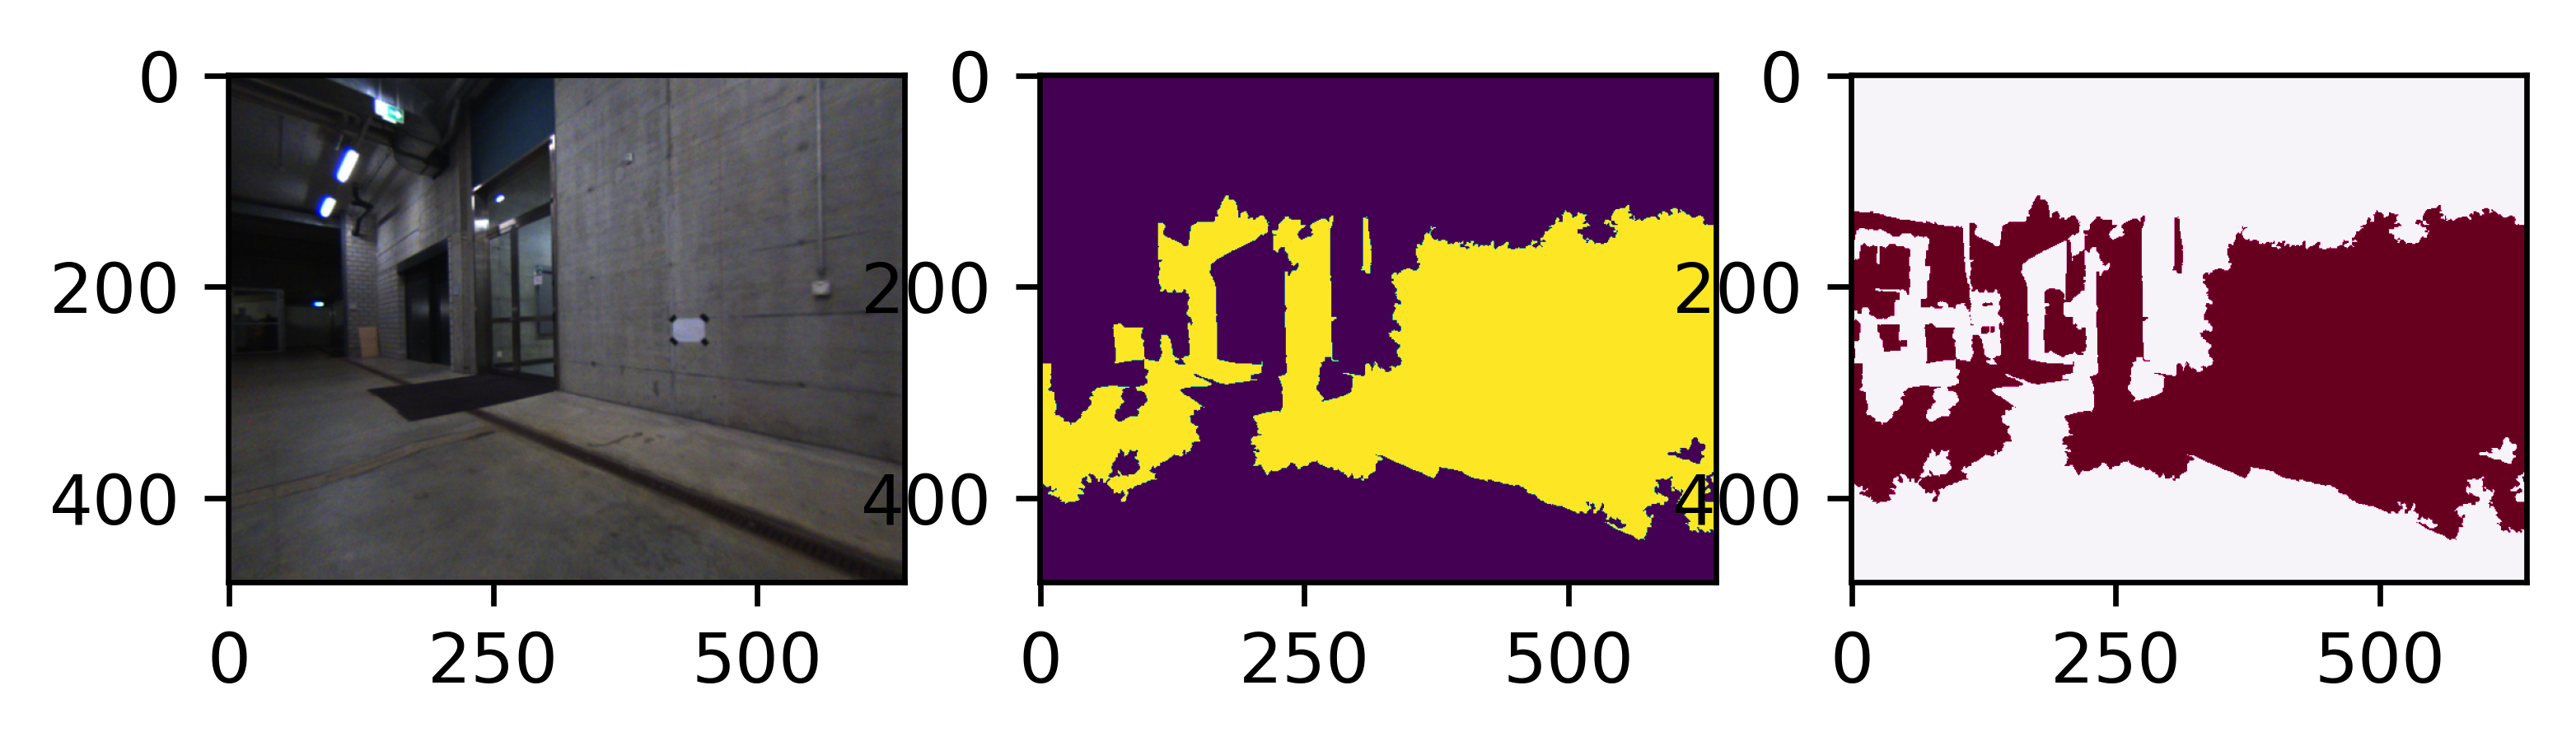

In [4]:
for sample_idx in range(batch_size):
    print(f"max label = {tf.math.reduce_max(batch[1][sample_idx])}")
    print(f"min label = {tf.math.reduce_min(batch[1][sample_idx])}")
    plt.figure(dpi=600)
    plt.subplot(131)
    # Image.
    plt.imshow(batch[0][sample_idx])
    plt.subplot(132)
    # Labels.
    plt.imshow(batch[1][sample_idx])
    plt.subplot(133)
    # Mask.
    plt.imshow(batch[2][sample_idx], cmap='PuRd')
    plt.show()

### Perform data augmentation

max non-augmented = 1.0
min non-augmented = 0.00138008629437536
max = 1.1482503414154053
min = 0.14963047206401825


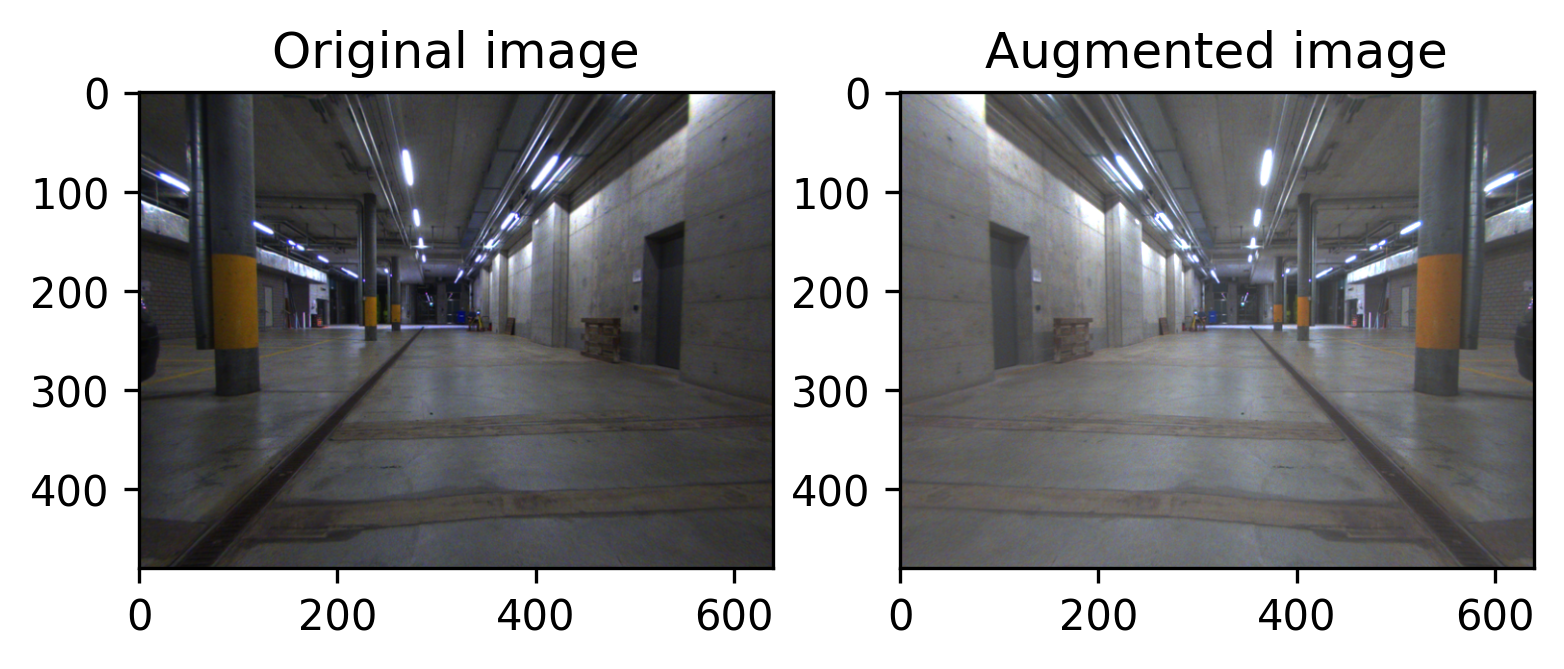

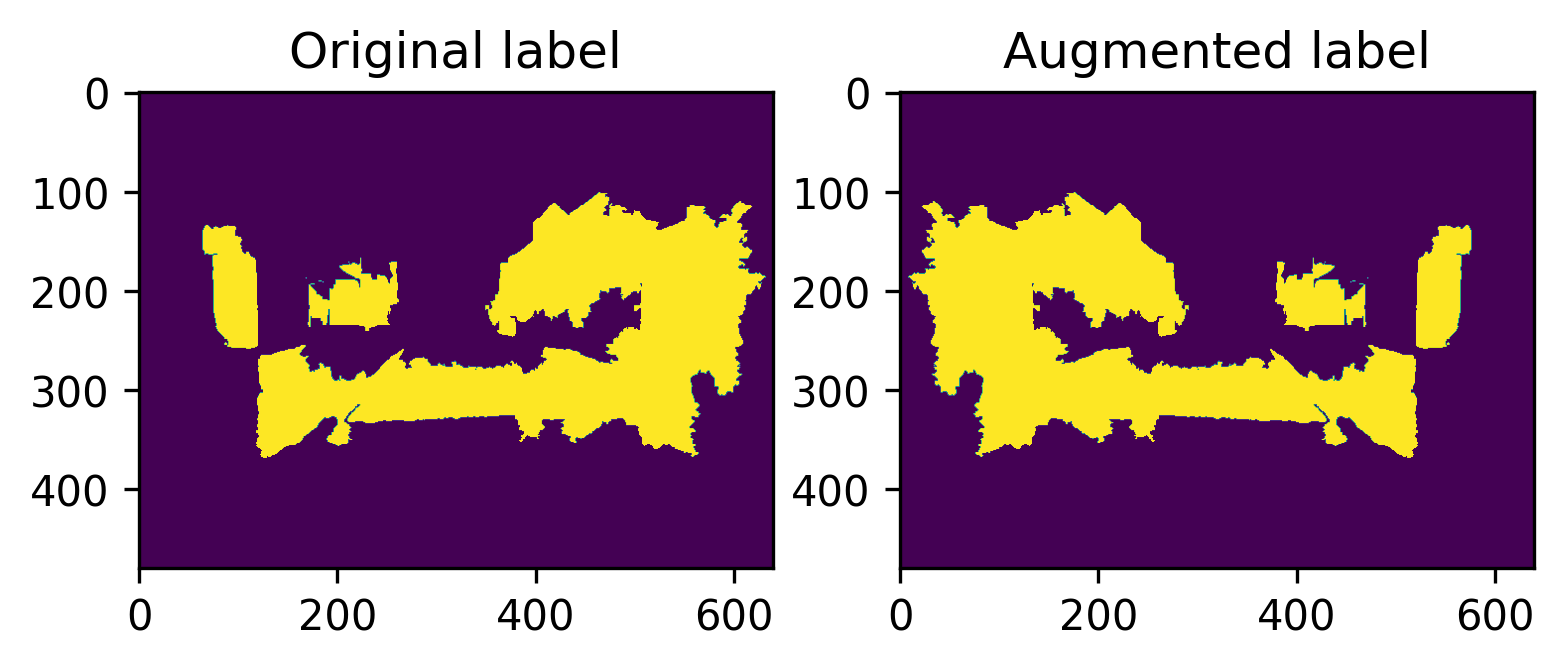

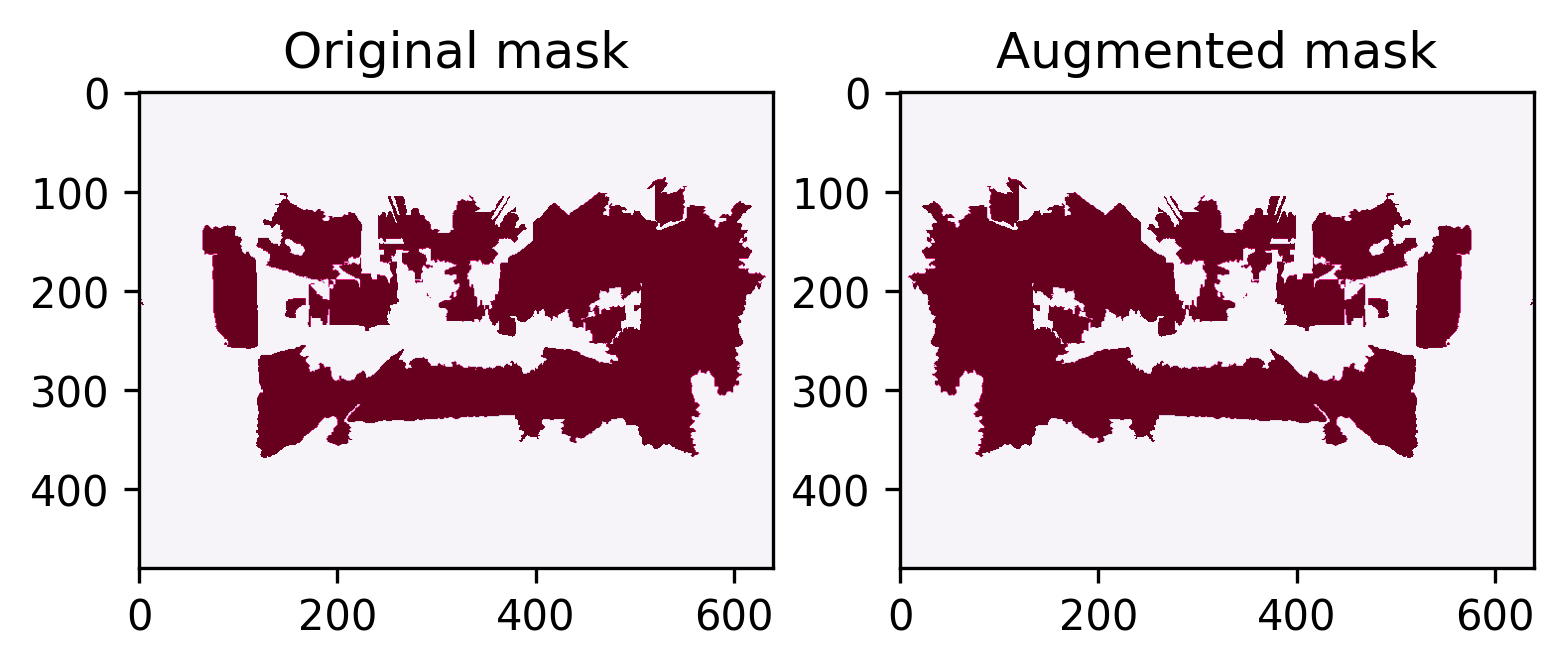

max non-augmented = 1.0
min non-augmented = 0.00024638581089675426
max = 1.1482503414154053
min = 0.14849677681922913


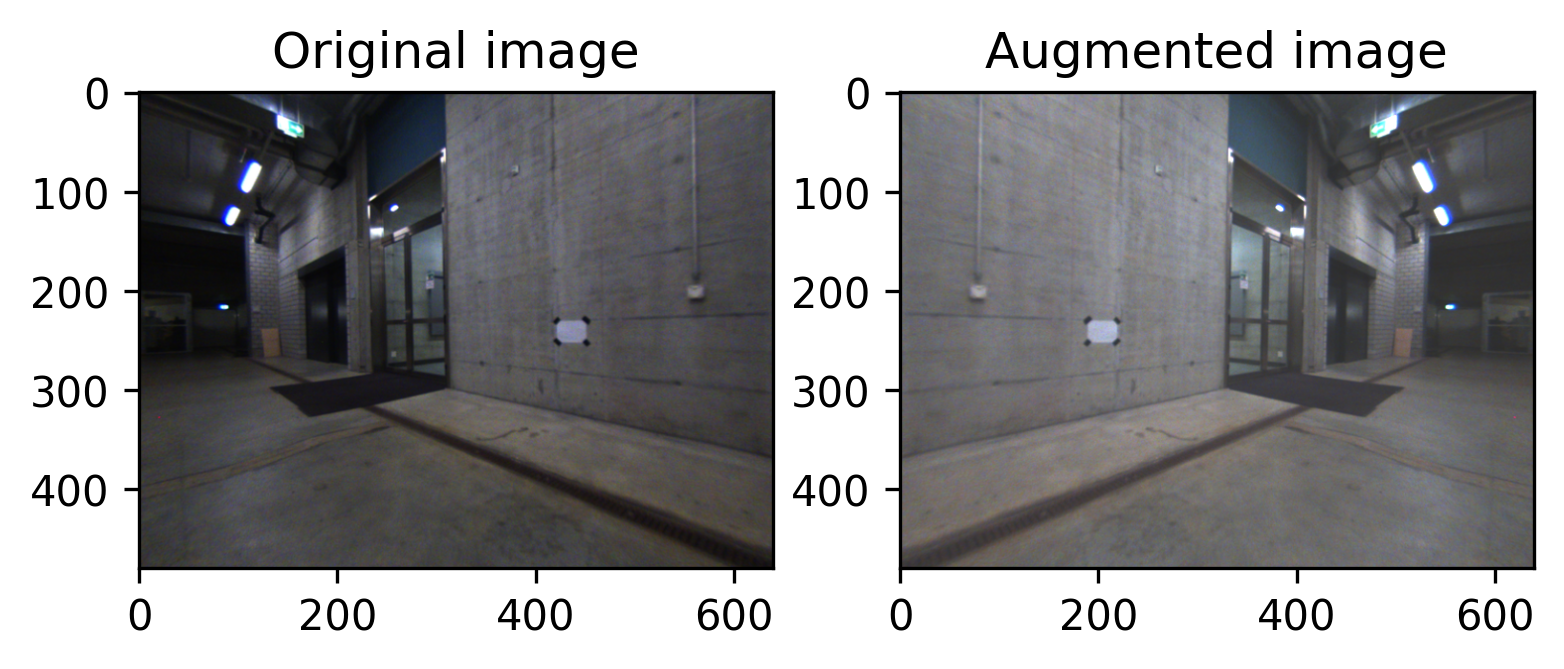

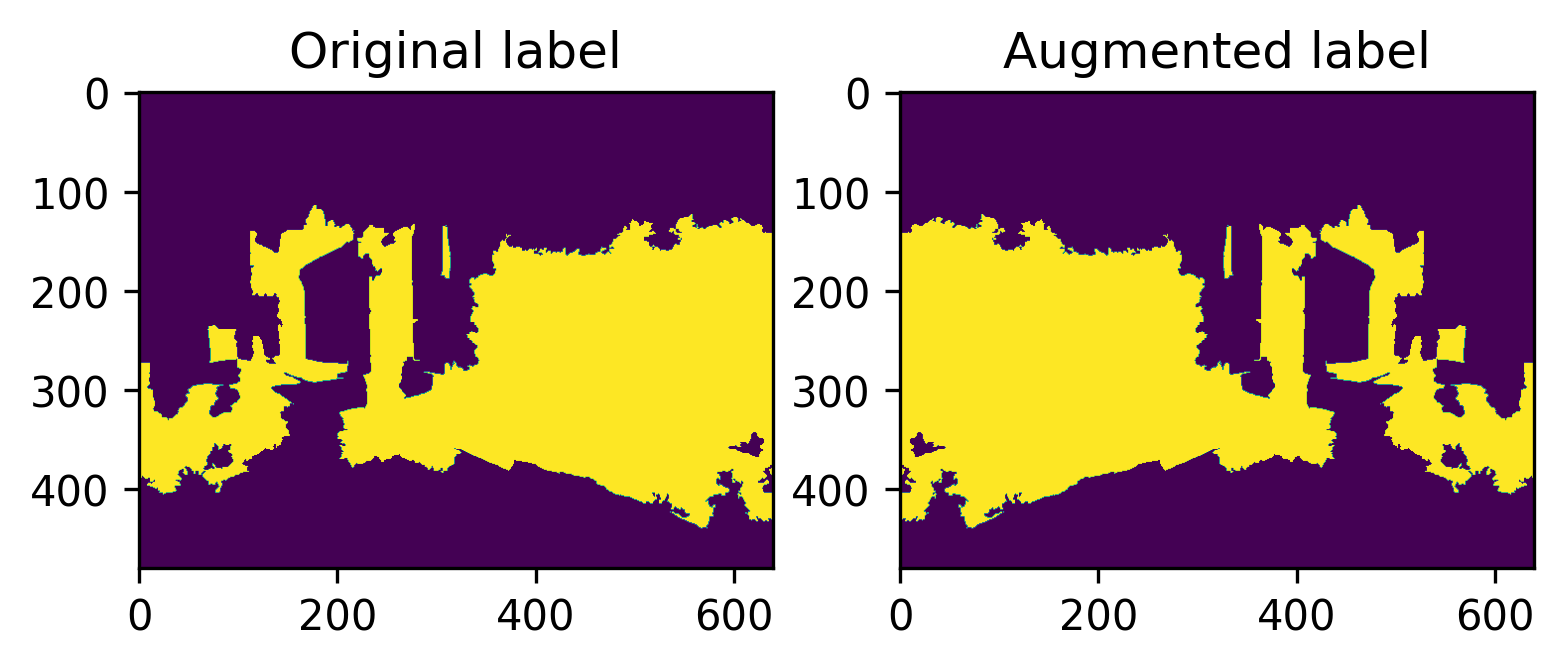

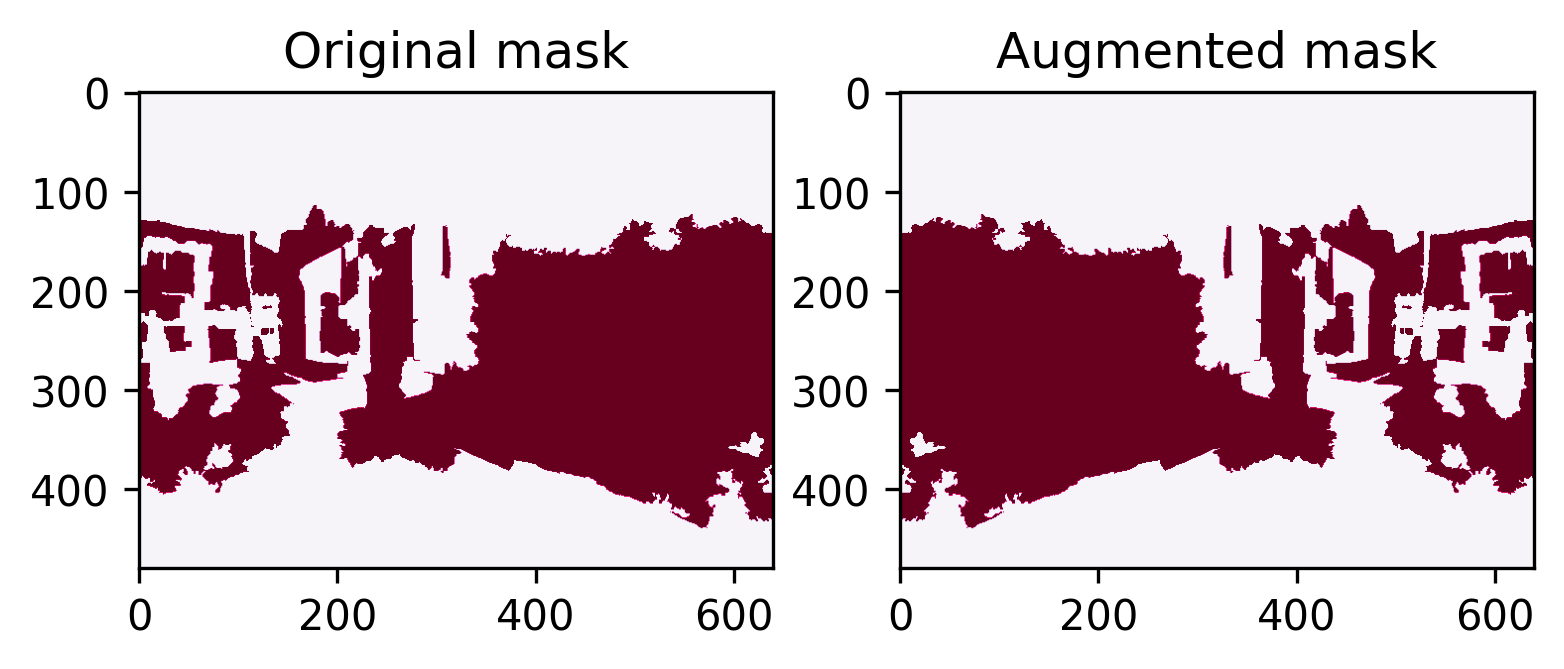

In [5]:
batch_aug = augmentation(image=batch[0], label=batch[1], mask=batch[2])

for sample_idx in range(batch_size):
    print(f"max non-augmented = {tf.math.reduce_max(batch[0][sample_idx])}")
    print(f"min non-augmented = {tf.math.reduce_min(batch[0][sample_idx])}")

    print(f"max = {tf.math.reduce_max(batch_aug[0][sample_idx])}")
    print(f"min = {tf.math.reduce_min(batch_aug[0][sample_idx])}")

    # Image.
    plt.figure(dpi=300)
    plt.subplot(121)
    plt.imshow(batch[0][sample_idx])
    plt.title("Original image")
    plt.subplot(122)
    plt.imshow(batch_aug[0][sample_idx])
    plt.title("Augmented image")
    plt.show()
    # Labels.
    plt.figure(dpi=300)
    plt.subplot(121)
    plt.imshow(batch[1][sample_idx])
    plt.title("Original label")
    plt.subplot(122)
    plt.imshow(batch_aug[1][sample_idx])
    plt.title("Augmented label")
    plt.show()
    # Masks.
    plt.figure(dpi=300)
    plt.subplot(121)
    plt.imshow(batch[2][sample_idx], cmap='PuRd')
    plt.title("Original mask")
    plt.subplot(122)
    plt.imshow(batch_aug[2][sample_idx], cmap='PuRd')
    plt.title("Augmented mask")
    plt.show()

#### Caution:

(2, 480, 640, 1)
(2, 480, 640, 1)
(480, 640)


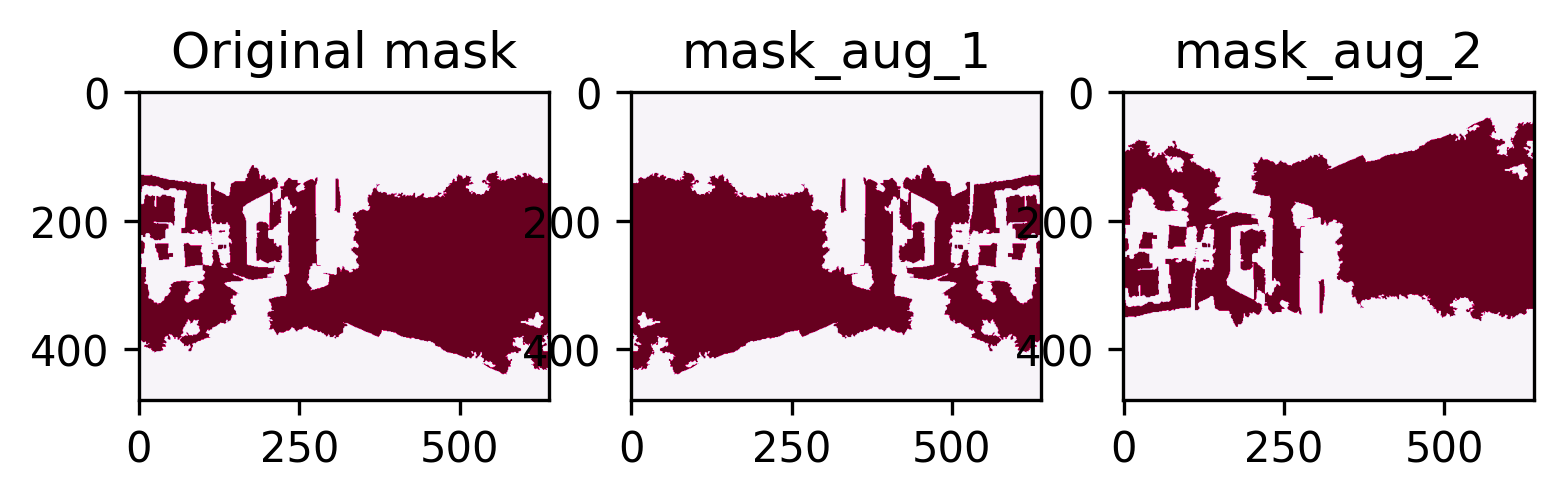

In [6]:
mask = batch[2]
print(tf.expand_dims(mask, axis=-1).shape)
mask_aug_1 = tf.image.flip_left_right(tf.expand_dims(mask, axis=-1))
print(mask_aug_1.shape)
print(tf.image.flip_left_right(batch[2])[sample_idx].shape)
mask_aug_2 = tf.image.flip_left_right(batch[2])[sample_idx]

plt.figure(dpi=300)
plt.subplot(131)
plt.imshow(mask[sample_idx], cmap='PuRd')
plt.title("Original mask")
plt.subplot(132)
plt.imshow(mask_aug_1[sample_idx], cmap='PuRd')
plt.title("mask_aug_1")
plt.subplot(133)
plt.imshow(mask_aug_2, cmap='PuRd')
plt.title("mask_aug_2")
plt.show()

In [10]:
train_ds.unbatch()

<_UnbatchDataset shapes: ((480, 640, 3), (480, 640, 1), (480, 640)), types: (tf.float32, tf.uint8, tf.bool)>

In [29]:
@tf.function
def app_augmentation(x, y, m):
    return augmentation(x, y, m)

def my_gen(ds):
    return ds.map(augmentation)

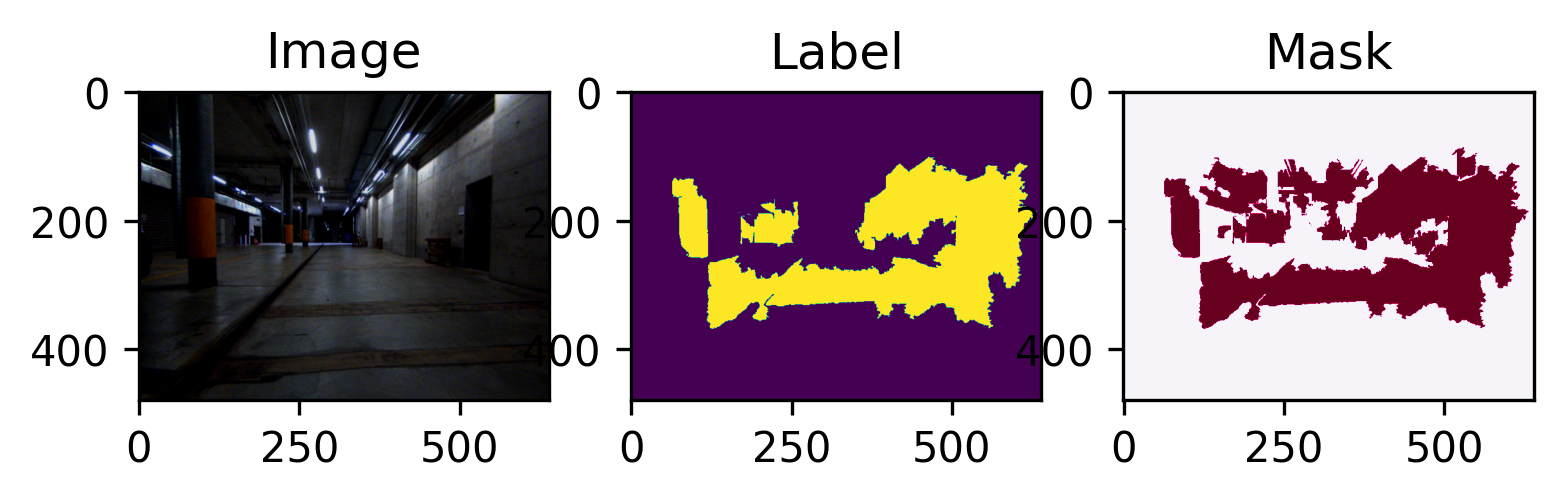

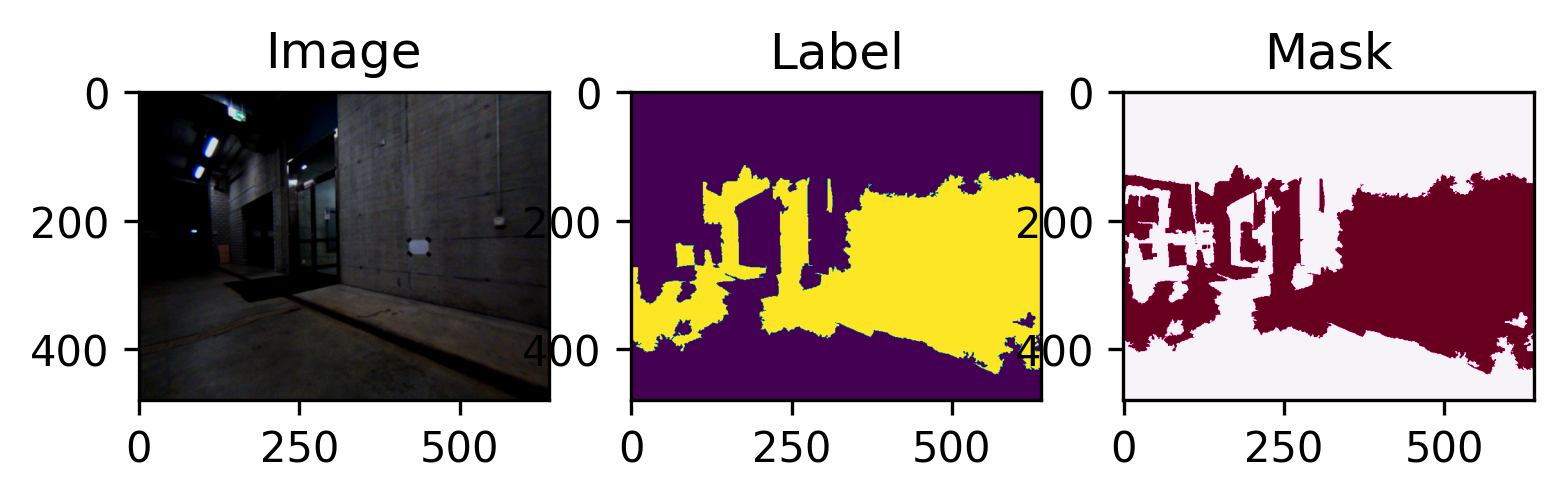

In [35]:
for batch_gen in my_gen(train_ds):
    for sample_idx in range(batch_size):
        # Image.
        plt.figure(dpi=300)
        plt.subplot(131)
        plt.imshow(batch_gen[0][sample_idx])
        plt.title("Image")
        plt.subplot(132)
        plt.imshow(batch_gen[1][sample_idx])
        plt.title("Label")
        plt.subplot(133)
        plt.imshow(batch_gen[2][sample_idx], cmap='PuRd')
        plt.title("Mask")
        plt.show()
    break